In [8]:
from libs.nodes import *
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [9]:
pathA = '../data/soln/26.txt'
pathB = '../data/tmp/26.soln'

In [10]:
def parseGraph(path):
    graph = nx.DiGraph()

    with open(path, 'r') as f:
        lines = f.readlines()
        
        for line in lines:
            (a, b) = line.split(' -> ')
            to_node = lambda x: [int(i) for i in x.strip().split(' ')]
            parent = node(to_node(a))
            child = node(to_node(b))
            
            graph.add_edge(parent, child)
    
    return graph

graphA = parseGraph(pathA)
graphB = parseGraph(pathB)

# Out Degrees

Mean Out Degree: 1.0384615384615385
Mean Out Degree: 1.0384615384615385


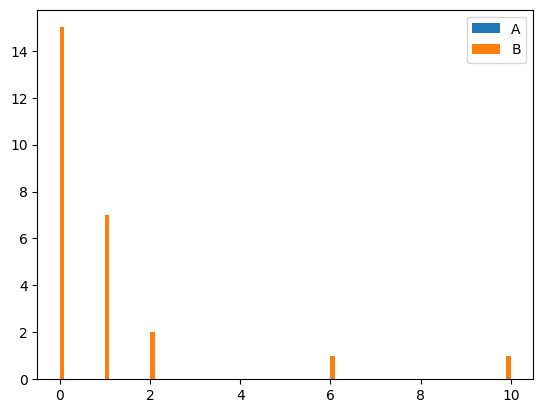

In [11]:
def plot_out_degree(graph):
    out_degrees = [graph.out_degree(node) for node in graph.nodes()]
    out_degrees = np.array(out_degrees)
    plt.hist(out_degrees, bins=100)
    print('Mean Out Degree:', np.mean(out_degrees))

plot_out_degree(graphA)
plot_out_degree(graphB)
plt.legend(['A', 'B'])
plt.show()

# Edge to Edge Comparison

In [12]:
def edge_diff(graphA, graphB):
    edgesA = set(graphA.edges())
    edgesB = set(graphB.edges())
    diff = edgesA.symmetric_difference(edgesB)
    
    print(len(diff), 'different edges')
    print('First 100 different edges:', list(diff)[:100])

edge_diff(graphA, graphB)

0 different edges
First 100 different edges: []


In [13]:
# testing edge_diff

test_graph1 = nx.DiGraph()
test_graph1.add_edge(node([1, 2]), node([3, 4]))
test_graph1.add_edge(node([3, 4]), node([5, 6]))

test_graph2 = nx.DiGraph()
test_graph2.add_edge(node([1, 2]), node([3, 4]))
test_graph2.add_edge(node([3, 4]), node([5, 6]))
test_graph2.add_edge(node([5, 6]), node([7, 8]))

edge_diff(test_graph1, test_graph2)

1 different edges
First 100 different edges: [((5,6), (7,8))]
